In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# 📌 Load your dataset
df = pd.read_csv("C:\\Users\\Alefiya JM\\OneDrive\\Desktop\\creditcard.csv")  # Replace with actual file

In [3]:
X = df.drop(columns=['Class'])
y = df['Class']

In [4]:
# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# 📌 Define Base Models
rf = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 5}, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))
lr = LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=500)

In [6]:
stacked_model = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lr', lr)
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),  # Logistic Regression as Meta-model
    passthrough=True  # Pass raw features & base model predictions
)

In [7]:
# 📌 Train Model
stacked_model.fit(X_train, y_train)

C:\Users\Alefiya JM\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [21:55:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Alefiya JM\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alefiya JM\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [22:17:35] WARNING

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight={0: 1,
                                                                     1: 5},
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              g...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lr',
                                LogisticRegression(class_weight={0: 1, 1: 5},
                                                   max_iter=500))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   passthrough=True)

In [8]:
# 📌 Make Predictions
y_pred = stacked_model.predict(X_test)

In [9]:
# 📌 Evaluate Model
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📌 Confusion Matrix:
[[56849    15]
 [   30    68]]


In [10]:
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred))


📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.69      0.75        98

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
print("\n📌 Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


📌 Accuracy Score: 99.92 %


In [12]:
from sklearn.metrics import roc_auc_score
# Predictions
y_pred = stacked_model.predict(X_test)
y_prob = stacked_model.predict_proba(X_test)[:, 1]  # Probability of fraud

# 1️⃣ Precision, Recall, and F1-Score
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred))

# 2️⃣ Fraud Probability (%)
sample_index = 0  # Change to test different samples
print(f"\n📌 Fraud Probability for Sample {sample_index}: {y_prob[sample_index] * 100:.2f}%")

# 3️⃣ AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"\n📌 AUC Score: {auc_score:.4f}")

# 4️⃣ Compare Predictions vs. Actual Fraud Cases
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 5️⃣ False Positives & False Negatives
print(f"\n📌 False Positives: {fp}")
print(f"📌 False Negatives: {fn}")

# 6️⃣ Overfitting Percentage (Difference in Train & Test Accuracy)
train_acc = stacked_model.score(X_train, y_train)
test_acc = stacked_model.score(X_test, y_test)
overfit_percent = (train_acc - test_acc) * 100
print(f"\n📌 Overfitting Percentage: {overfit_percent:.2f}%")


📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.69      0.75        98

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962


📌 Fraud Probability for Sample 0: 0.01%

📌 AUC Score: 0.9475

📌 False Positives: 15
📌 False Negatives: 30

📌 Overfitting Percentage: 0.00%


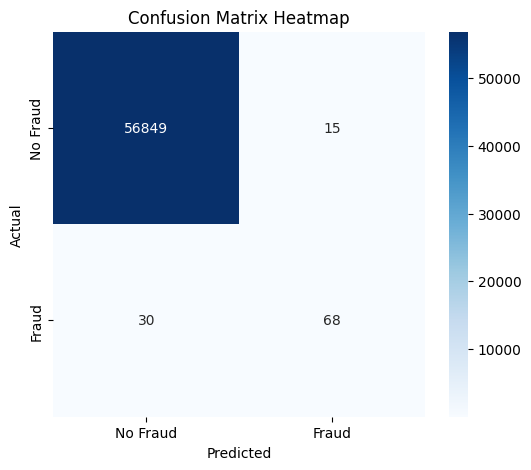

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 🔥 7️⃣ Heatmap for Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

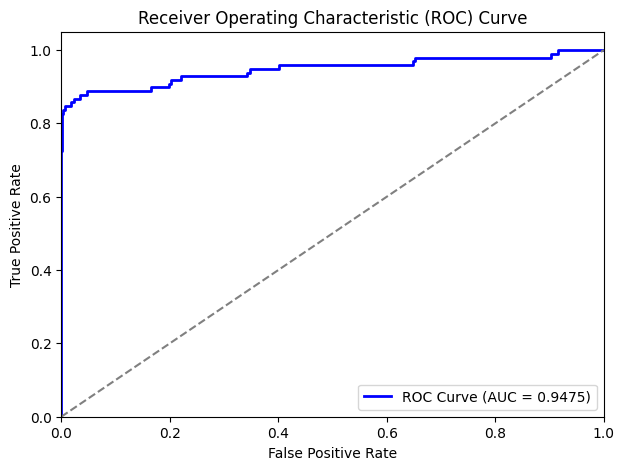

In [14]:
from sklearn.metrics import roc_curve, auc

# 🔥 8️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

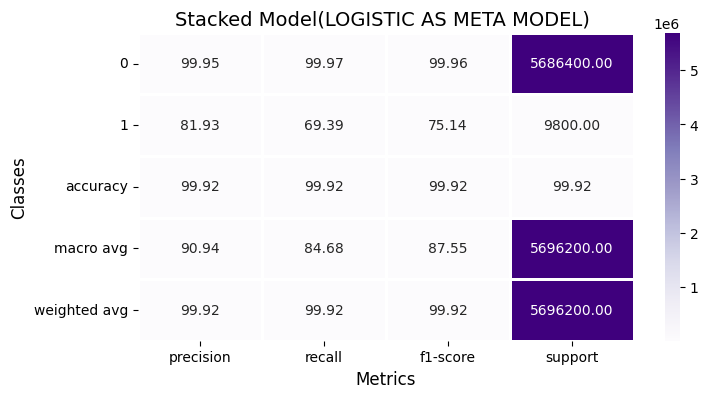

In [16]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Predict using the stacked model
y_pred_stacked = stacked_model.predict(X_test)

# Generate classification report
report_stacked = classification_report(y_test, y_pred_stacked, output_dict=True)

# Convert the report to DataFrame
report_df_stacked = pd.DataFrame(report_stacked).transpose()

# Convert to percentage format
report_df_stacked *= 100

# Plot the heatmap with purple shades
plt.figure(figsize=(8, 4))
sns.heatmap(report_df_stacked, annot=True, cmap="Purples", fmt=".2f", linewidths=1, cbar=True)

# Adjust labels and title
plt.title("Stacked Model(LOGISTIC AS META MODEL) ", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.show()
